In [16]:
import pandas as pd

# 데이터프레임으로 읽어오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')

# 'ID' 열 제거
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

# 결과 확인
train.head(), test.head(), ss.head()

(            사고일시   요일 기상상태            시군구      도로형태 노면상태  사고유형 사고유형 - 세부분류  \
 0  2019-01-01 00  화요일   맑음   대구광역시 중구 대신동  단일로 - 기타   건조  차대사람  길가장자리구역통행중   
 1  2019-01-01 00  화요일   흐림  대구광역시 달서구 감삼동  단일로 - 기타   건조  차대사람       보도통행중   
 2  2019-01-01 01  화요일   맑음  대구광역시 수성구 두산동  단일로 - 기타   건조  차대사람       차도통행중   
 3  2019-01-01 02  화요일   맑음   대구광역시 북구 복현동  단일로 - 기타   건조   차대차          추돌   
 4  2019-01-01 04  화요일   맑음   대구광역시 동구 신암동  단일로 - 기타   건조   차대차          추돌   
 
       법규위반 가해운전자 차종  ... 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  \
 0  안전운전불이행       승용  ...       상해없음      보행자        여      70세         중상   
 1       기타       승용  ...       상해없음      보행자        남      61세         경상   
 2  안전운전불이행       승용  ...       상해없음      보행자        남      38세         경상   
 3  안전운전불이행       승용  ...       상해없음       승용        남      36세         중상   
 4  안전운전불이행       승용  ...       상해없음       승용        남      52세         경상   
 
   사망자수 중상자수  경상자수  부상자수  ECLO  
 0    0    1     0   

In [17]:
train.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [18]:
test.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [19]:
def wrangling(train_set, test_set):

    print("---Shape---")
    display(train_set.shape)
    display(test_set.shape)

    print("---Info----")
    display(train_set.info())
    display(test_set.info())

    print("---NaN----")
    display(train_set.isna().sum())
    display(test_set.isna().sum())

    print("---Duplicated---")
    display(train_set[train_set.duplicated()])
    display(test_set[test_set.duplicated()])

    print("---Description---")
    display(train_set.describe())
    display(test_set.describe())

    print("---Unique---")
    display(train_set.nunique())
    display(test_set.nunique())

wrangling(train,test)

---Shape---


(39609, 22)

(10963, 7)

---Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고일시         39609 non-null  object
 1   요일           39609 non-null  object
 2   기상상태         39609 non-null  object
 3   시군구          39609 non-null  object
 4   도로형태         39609 non-null  object
 5   노면상태         39609 non-null  object
 6   사고유형         39609 non-null  object
 7   사고유형 - 세부분류  39609 non-null  object
 8   법규위반         39609 non-null  object
 9   가해운전자 차종     39609 non-null  object
 10  가해운전자 성별     39609 non-null  object
 11  가해운전자 연령     39609 non-null  object
 12  가해운전자 상해정도   39609 non-null  object
 13  피해운전자 차종     38618 non-null  object
 14  피해운전자 성별     38618 non-null  object
 15  피해운전자 연령     38618 non-null  object
 16  피해운전자 상해정도   38618 non-null  object
 17  사망자수         39609 non-null  int64 
 18  중상자수         39609 non-null  int64 
 19  경상자수         

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    10963 non-null  object
 1   요일      10963 non-null  object
 2   기상상태    10963 non-null  object
 3   시군구     10963 non-null  object
 4   도로형태    10963 non-null  object
 5   노면상태    10963 non-null  object
 6   사고유형    10963 non-null  object
dtypes: object(7)
memory usage: 599.7+ KB


None

---NaN----


사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64

---Duplicated---


,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
3360,2019-04-05 11,금요일,맑음,대구광역시 수성구 매호동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승용,...,상해없음,승용,여,37세,경상,0,0,1,0,3


,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
758,2022-01-27 13,목요일,맑음,대구광역시 동구 효목동,교차로 - 교차로안,건조,차대차
994,2022-02-07 07,월요일,맑음,대구광역시 서구 내당동,단일로 - 기타,건조,차대차
1185,2022-02-14 17,월요일,맑음,대구광역시 남구 봉덕동,단일로 - 기타,건조,차대차
1633,2022-03-03 08,목요일,맑음,대구광역시 서구 비산동,단일로 - 기타,건조,차대차
2527,2022-04-06 08,수요일,맑음,대구광역시 북구 태전동,교차로 - 교차로안,건조,차대차
3246,2022-04-29 08,금요일,비,대구광역시 달서구 상인동,단일로 - 기타,젖음/습기,차대차
3330,2022-05-01 18,일요일,맑음,대구광역시 달서구 송현동,단일로 - 기타,건조,차대차
3360,2022-05-02 20,월요일,비,대구광역시 달서구 상인동,교차로 - 교차로안,젖음/습기,차대차
3817,2022-05-15 15,일요일,맑음,대구광역시 수성구 만촌동,단일로 - 기타,건조,차대차
3888,2022-05-17 17,화요일,맑음,대구광역시 북구 노원동3가,단일로 - 기타,건조,차대차


---Description---


,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
count,10963,10963,10963,10963,10963,10963,10963
unique,5548,7,5,192,11,6,3
top,2022-11-10 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차
freq,10,1743,10321,422,5039,10394,8559


---Unique---


사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

사고일시    5548
요일         7
기상상태       5
시군구      192
도로형태      11
노면상태       6
사고유형       3
dtype: int64

In [20]:
import re
import numpy as np

def extract_and_convert_to_int(data):
    numbers = re.findall(r'\d+', str(data))
    return int(numbers[0]) if numbers else np.nan

train['가해운전자 연령'] = train['가해운전자 연령'].apply(extract_and_convert_to_int)
train['피해운전자 연령'] = train['피해운전자 연령'].apply(extract_and_convert_to_int)

In [21]:
num_cols = train.select_dtypes(exclude='object').columns.tolist()
cat_cols = train.select_dtypes(include='object').columns.tolist()

In [22]:
columns_of_interest = ['가해운전자 연령', '피해운전자 연령', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO']
selected_columns = train[columns_of_interest]

print(selected_columns)


       가해운전자 연령  피해운전자 연령  사망자수  중상자수  경상자수  부상자수  ECLO
0          51.0      70.0     0     1     0     0     5
1          39.0      61.0     0     0     1     0     3
2          70.0      38.0     0     0     1     0     3
3          49.0      36.0     0     1     0     0     5
4          30.0      52.0     0     0     1     0     3
...         ...       ...   ...   ...   ...   ...   ...
39604      52.0      28.0     0     0     1     0     3
39605      60.0      52.0     0     0     1     0     3
39606      60.0      73.0     0     2     0     0    10
39607      40.0      57.0     0     0     1     0     3
39608      27.0      33.0     0     0     2     0     6

[39609 rows x 7 columns]


<ipython-input-24-761aa3a1fd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col])
<ipython-input-24-761aa3a1fd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col])
<ipython-input-24-761aa3a1fd8e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

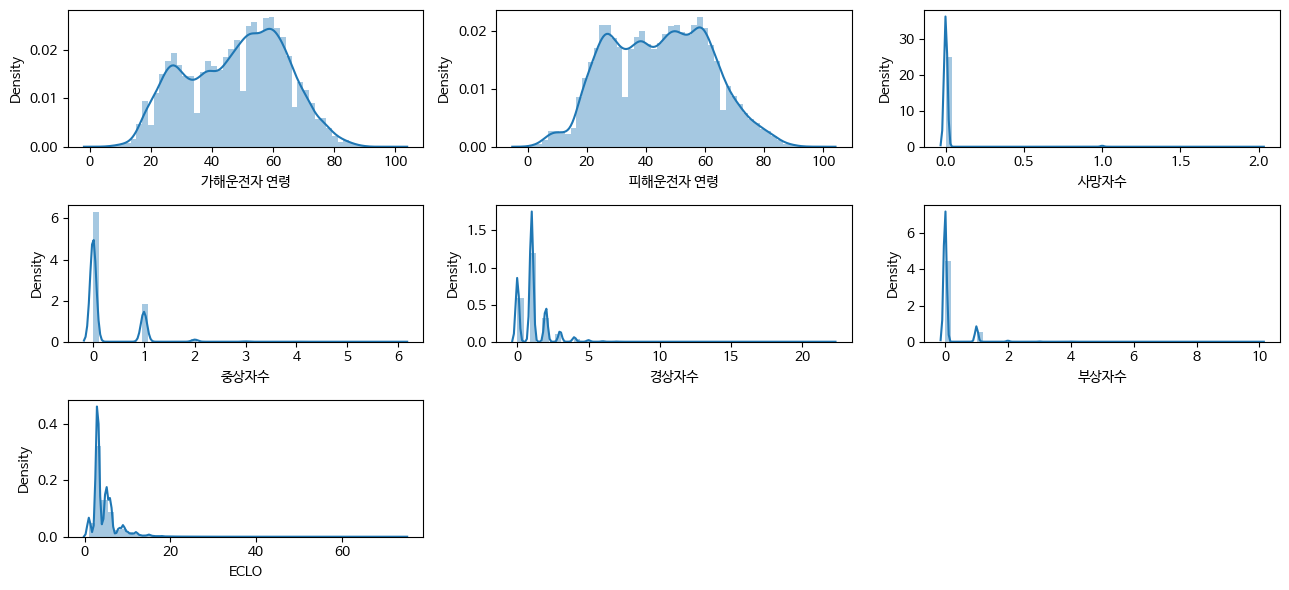

In [24]:
i = 0
plt.figure(figsize=(13,6))
for col in num_cols:
    i += 1
    plt.subplot(3,3,i)
    sns.distplot(train[col])
plt.tight_layout()

<ipython-input-28-ca6b165672de>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['ECLO'],ci=None)
<ipython-input-28-ca6b165672de>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['ECLO'],ci=None)
<ipython-input-28-ca6b165672de>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['ECLO'],ci=None)
<ipython-input-28-ca6b165672de>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['ECLO'],ci=None)
<ipython-input-28-ca6b165672de>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['ECLO'],ci=None)
<ipython-input-28-ca6b165672de>:18: FutureWarning: 

The `ci` parameter is deprecated. Use

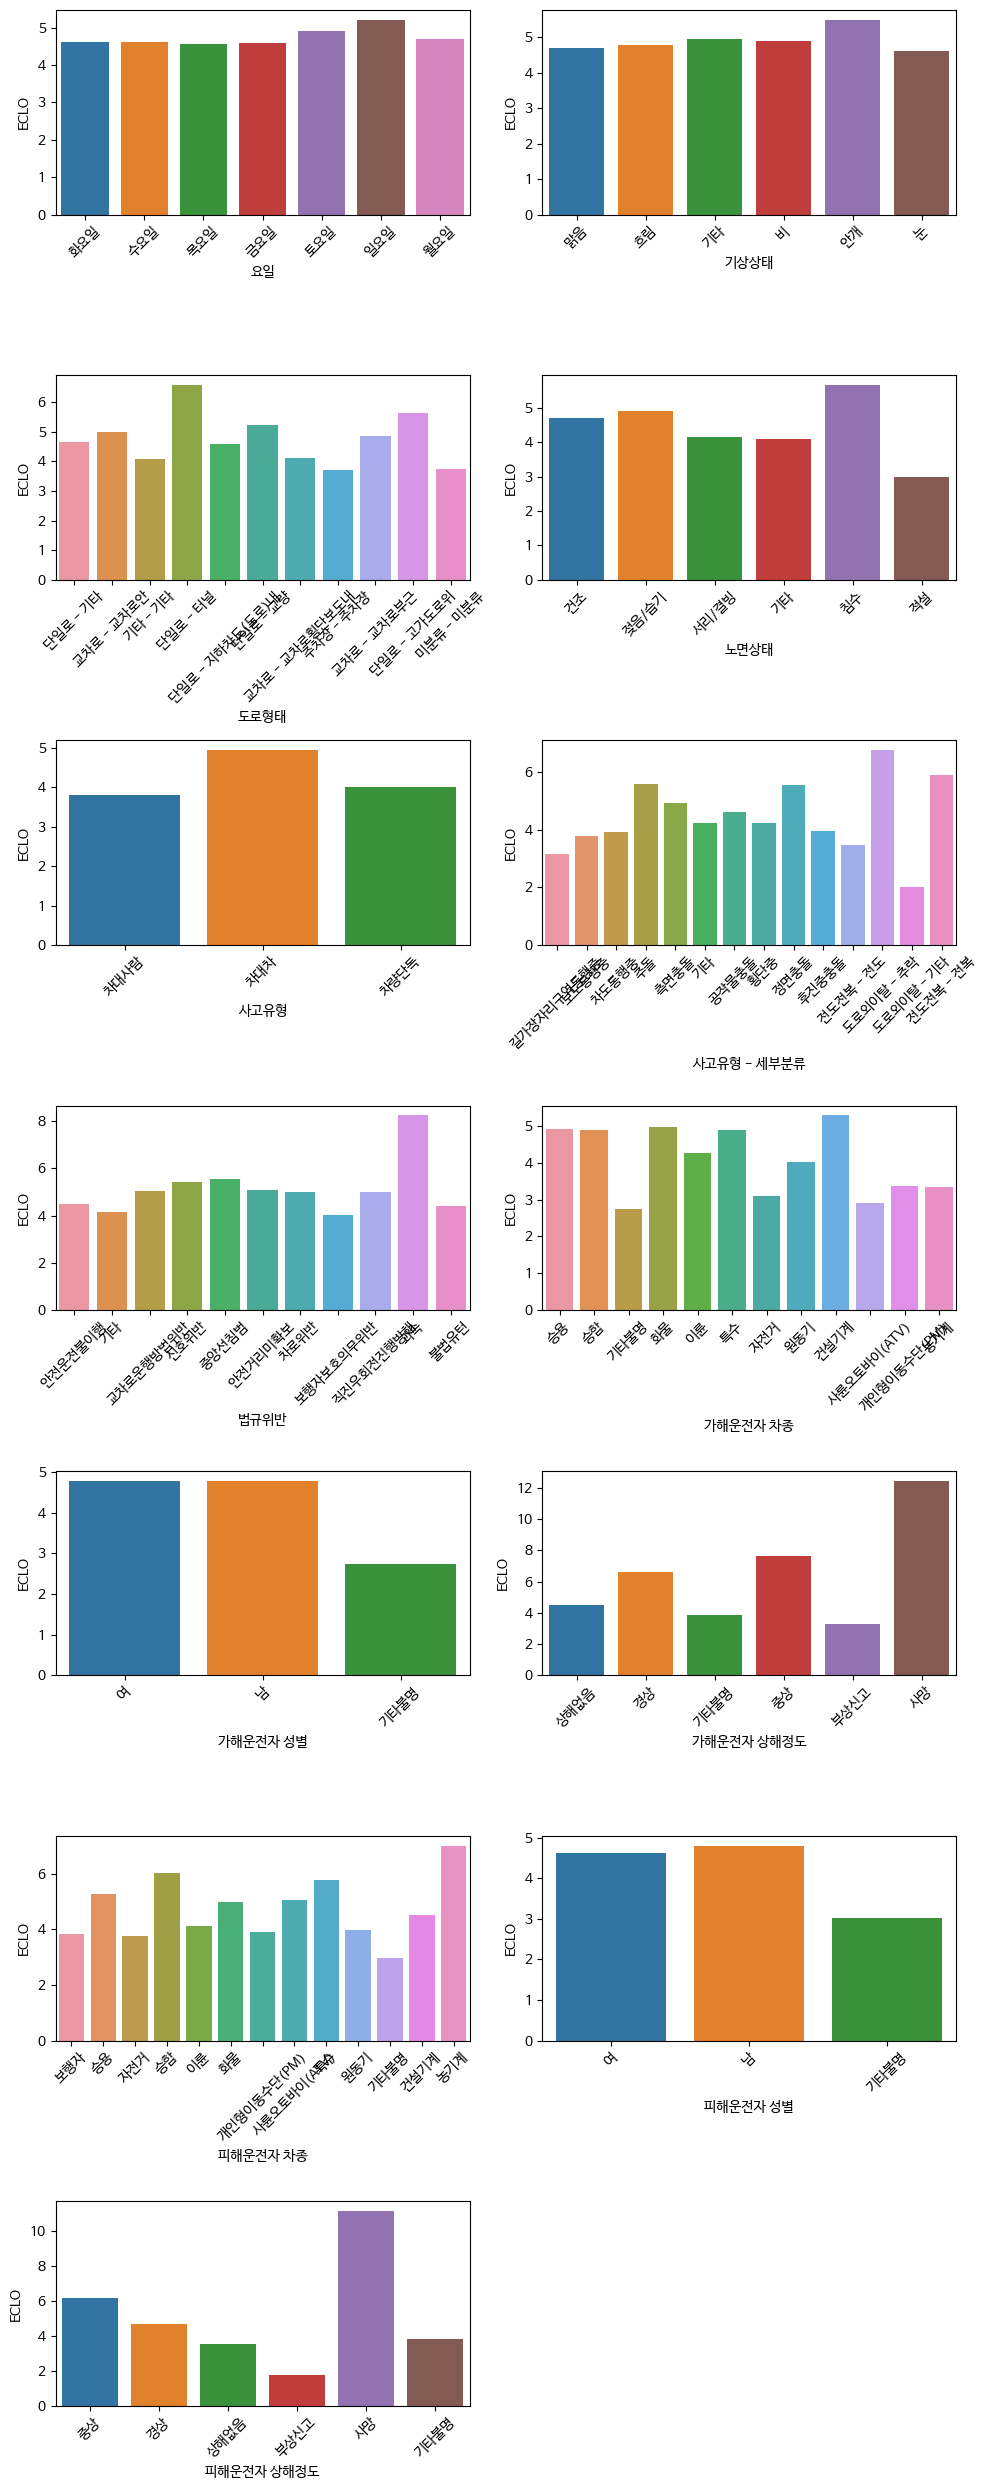

In [28]:
i = 0
plt.figure(figsize=(10,25))
for col in ['요일',
 '기상상태',
 '도로형태',
 '노면상태',
 '사고유형',
 '사고유형 - 세부분류',
 '법규위반',
 '가해운전자 차종',
 '가해운전자 성별',
 '가해운전자 상해정도',
 '피해운전자 차종',
 '피해운전자 성별',
 '피해운전자 상해정도']:
    i += 1
    plt.subplot(7,2,i)
    sns.barplot(x=train[col], y=train['ECLO'],ci=None)
    plt.xticks(rotation=45)
plt.tight_layout()

# 토요일, 일요일의 경우 보다 ECLO가 높음
# 안개가 낀 상황에 ECLO가 높음
# 단일로 - 터널의 경우 ECLO가 높음
# 노면상태가 침수인 경우 ECLO가 높았으며 반대로, 적설인 경우 ECLO가 낮음
# 차vs사람 보다 차vs차일 때 ECLO가 높음
# 법규위반이 과속인 경우 ECLO가 높음
# 가해운전자 차종이 승용, 승합, 화물, 건설기계인 경우 ECLO가 높음
# 가해운전자 성별에 따른 차이는 보이지 않음
# 피해운전자 차종이 농기계인 경우 ECLO가 높음

In [29]:
num_by_region = train.groupby(['시군구'])['ECLO'].mean().sort_values(ascending=False)
print("높은 ECLO")
display(num_by_region[:10])
print()
print("낮은 ECLO")
display(num_by_region[-10:])

높은 ECLO


시군구
대구광역시 북구 노곡동    10.333333
대구광역시 동구 덕곡동     9.875000
대구광역시 중구 대안동     9.333333
대구광역시 동구 내동      8.400000
대구광역시 중구 하서동     8.000000
대구광역시 동구 진인동     7.823529
대구광역시 동구 둔산동     7.571429
대구광역시 북구 조야동     7.120000
대구광역시 동구 송정동     7.071429
대구광역시 북구 도남동     7.000000
Name: ECLO, dtype: float64


낮은 ECLO


시군구
대구광역시 동구 매여동      3.666667
대구광역시 중구 삼덕동1가    3.511013
대구광역시 중구 향촌동      3.400000
대구광역시 중구 수창동      3.392857
대구광역시 중구 서성로2가    3.333333
대구광역시 중구 북성로1가    3.333333
대구광역시 중구 화전동      3.333333
대구광역시 동구 미대동      3.300000
대구광역시 중구 종로2가     2.500000
대구광역시 중구 동일동      2.333333
Name: ECLO, dtype: float64

In [30]:
train['구'] = train['시군구'].str.split(" ",expand=True)[1]
train['동'] = train['시군구'].str.split(" ",expand=True)[2]

In [32]:
display(train.groupby(['구'])['ECLO'].mean().nlargest(10))
display(train.groupby(['동'])['ECLO'].mean().nlargest(10))

# 달성군에서 ECLO가 가장 큼 5.072280
# 노곡동에서 ECLO가 가장 큼 10.333333
# 달성군에는 중부내륙고속지선, 노곡동에는 신천대로가 있음

구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64

동
노곡동    10.333333
덕곡동     9.875000
대안동     9.333333
내동      8.400000
하서동     8.000000
진인동     7.823529
둔산동     7.571429
조야동     7.120000
송정동     7.071429
도남동     7.000000
Name: ECLO, dtype: float64

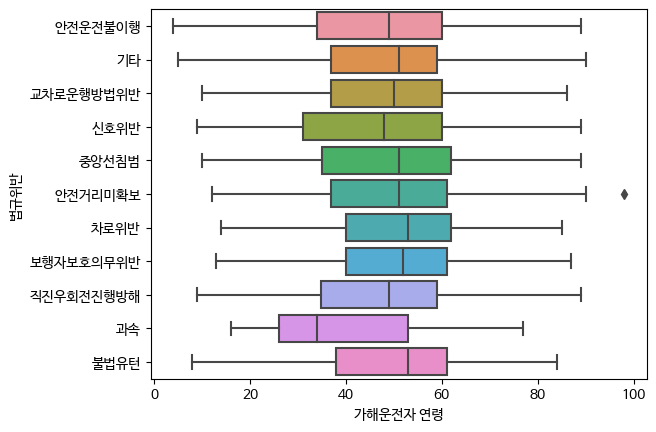

In [33]:
sns.boxplot(data=train, y='법규위반', x='가해운전자 연령')
plt.show()

# 10대미만의 운전자도 있음
# 30대 초중반 나이대에 과속이 많음

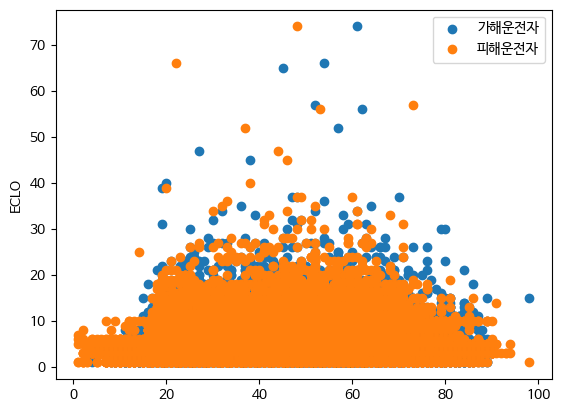

In [34]:
plt.scatter(x=train['가해운전자 연령'],y=train['ECLO'])
plt.ylabel("ECLO");

plt.scatter(x=train['피해운전자 연령'],y=train['ECLO'])
plt.ylabel("ECLO");
plt.legend(['가해운전자','피해운전자']);

# 가해운전자, 피해운전자와 ECLO간 선형관계 파악불가

In [35]:
train['년도'] = pd.to_datetime(train['사고일시']).dt.year
train['월'] = pd.to_datetime(train['사고일시']).dt.month
train['일'] = pd.to_datetime(train['사고일시']).dt.day
train['시간'] = pd.to_datetime(train['사고일시']).dt.hour

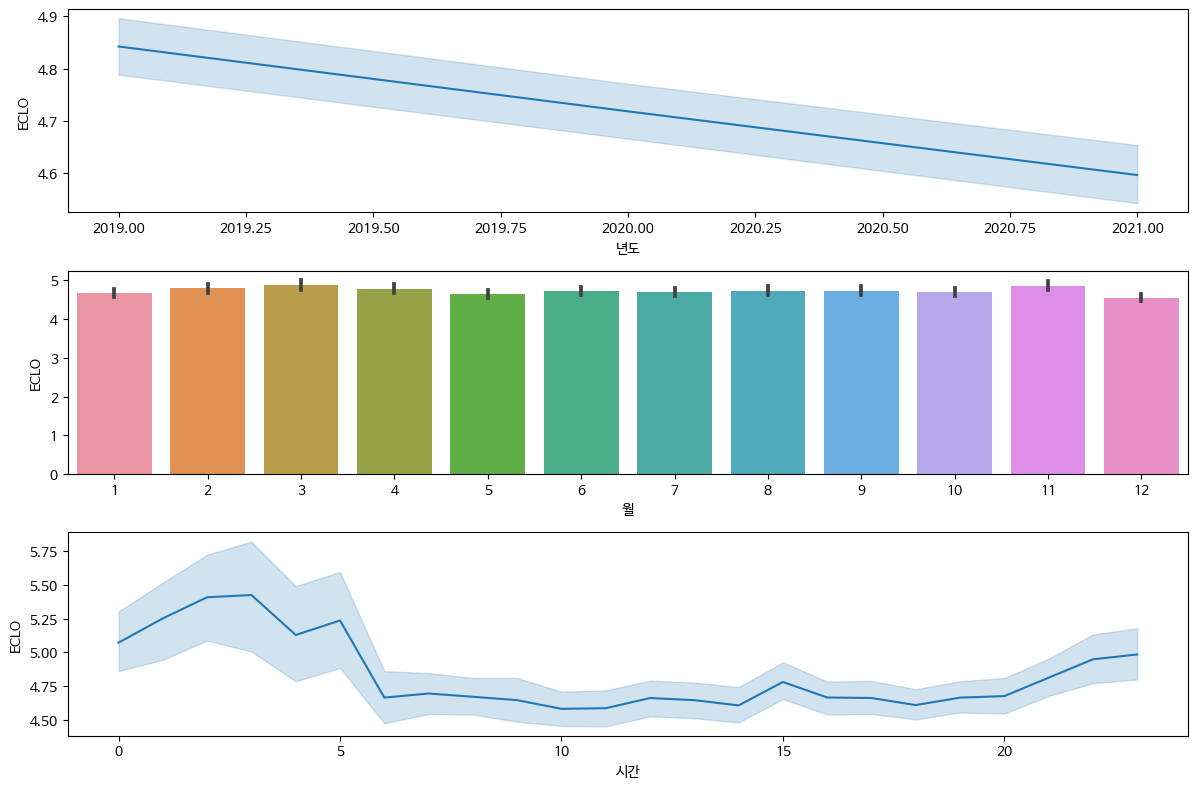

In [36]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
# 연도가 증가할수록 교통사고는 낮을 것
sns.lineplot(data=train, x='년도', y='ECLO')
plt.subplot(3,1,2)

# 공휴일이 있는 월에 ECLO가 높을 것
sns.barplot(data=train, x='월', y='ECLO')
plt.subplot(3,1,3)

# 출퇴근 시간에 ECLO가 높을 것
sns.lineplot(data=train, x='시간', y='ECLO')
plt.tight_layout();

# 연도가 증가할수록 ECLO는 낮음
# 20시 이후 03시까지 ECLO가 높음

<ipython-input-37-af006d592cb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True);
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


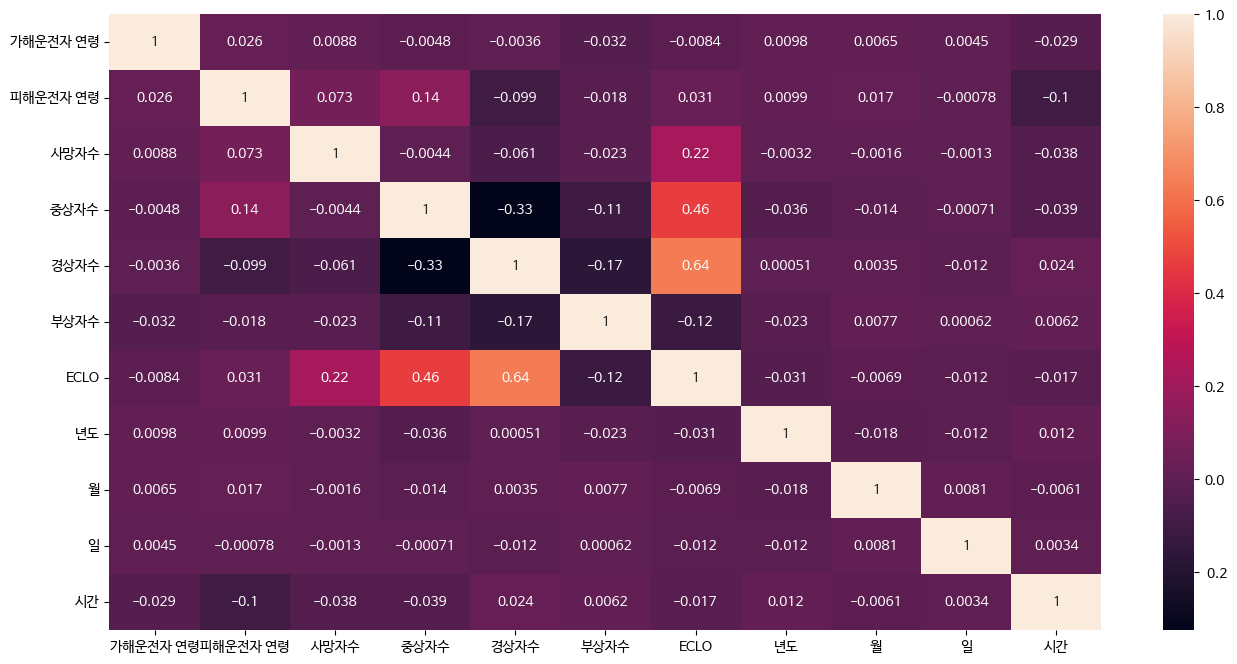

In [37]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True);

In [43]:
import os
import pandas as pd

# 파일 업로드 확인 및 디렉토리 확인
uploaded_files = os.listdir('/content/')
if '대구 보안등 정보.csv' in uploaded_files:
    file_path = '/content/대구 보안등 정보.csv'
else:
    raise FileNotFoundError("대구 보안등 정보.csv 파일이 업로드되지 않았습니다.")

# 데이터 읽어오기
light_df = pd.read_csv(file_path, encoding='cp949')[['설치개수', '소재지지번주소']]

# 주소 파싱
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

# 그룹화 및 합계 계산
light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)

# 결과 확인
light_df.head()


,도시,구,동,설치개수
0,대구광역시,남구,대명동,5377
1,대구광역시,남구,봉덕동,1424
2,대구광역시,남구,이천동,556
3,대구광역시,달서구,갈산동,349
4,대구광역시,달서구,감삼동,932


In [46]:
import os
import pandas as pd

# 파일 업로드 확인 및 디렉토리 확인
uploaded_files = os.listdir('/content/')
file_name = '대구 어린이 보호 구역 정보.csv'

if file_name in uploaded_files:
    print(f"{file_name} 파일이 업로드되었습니다.")
    # 파일을 데이터프레임으로 읽어오기
    child_area_df = pd.read_csv(file_name, encoding='cp949').drop_duplicates()[['소재지지번주소']]
    child_area_df['cnt'] = 1

    # 주소를 기반으로 도시, 구, 동 추출
    location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
    child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
    child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

    # 도시, 구, 동을 기준으로 그룹화하고 개수 합산
    child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
    child_area_df.reset_index(inplace=True, drop=True)

    # 결과 출력
    display(child_area_df.head())
else:
    raise FileNotFoundError(f"{file_name} 파일이 업로드되지 않았습니다.")

대구 어린이 보호 구역 정보.csv 파일이 업로드되었습니다.


,도시,구,동,cnt
0,대구광역시,남구,대명동,26
1,대구광역시,남구,봉덕동,8
2,대구광역시,남구,이천동,6
3,대구광역시,달성군,가창면,4
4,대구광역시,달성군,구지면,3


In [48]:
import os
import pandas as pd

# 파일 업로드 확인 및 디렉토리 확인
uploaded_files = os.listdir('/content/')
file_name = '대구 주차장 정보.csv'

if file_name in uploaded_files:
    print(f"{file_name} 파일이 업로드되었습니다.")
    # 파일을 데이터프레임으로 읽어오기
    parking_df = pd.read_csv(file_name, encoding='cp949')[['소재지지번주소', '급지구분']]
    parking_df = pd.get_dummies(parking_df, columns=['급지구분'])

    # 주소를 기반으로 도시, 구, 동 추출
    location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
    parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
    parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

    # 도시, 구, 동을 기준으로 그룹화하고 합산
    parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
    parking_df.reset_index(inplace=True, drop=True)

    # 결과 출력
    display(parking_df.head())
else:
    raise FileNotFoundError(f"{file_name} 파일이 업로드되지 않았습니다.")

대구 주차장 정보.csv 파일이 업로드되었습니다.


,도시,구,동,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3


In [50]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')

display(train_org.head())
display(test_org.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [51]:
train_df = train_org.copy()
test_df = test_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

In [52]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

In [53]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])


In [54]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])

In [55]:
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [61]:
# 패키지 import
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

# Assuming train_x and train_y are DataFrames
categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)

# TargetEncoder를 이용한 범주형 변수 변환
for i in categorical_features:
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])

# 결과 확인
display(train_x.head())
display(test_x.head())

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,cnt,급지구분_1,급지구분_2,급지구분_3
0,4.627926,4.712888,4.712878,3.817650,2019,1,1,0,4.726704,4.541610,4.282449,4.671841,4.599599,391.0,2.0,11.0,0.0,0.0
1,4.627926,4.779150,4.712878,3.817650,2019,1,1,0,4.726704,4.618441,4.738938,4.671841,4.599599,932.0,0.0,0.0,1.0,3.0
2,4.627926,4.712888,4.712878,3.817650,2019,1,1,1,4.726704,4.727300,4.842715,4.671841,4.599599,473.0,5.0,0.0,0.0,0.0
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.726704,4.687669,4.208920,4.671841,4.599599,534.0,11.0,0.0,9.0,5.0
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.726704,4.889534,4.549091,4.671841,4.599599,2057.0,0.0,0.0,1.0,0.0


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,cnt,급지구분_1,급지구분_2,급지구분_3
0,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.726704,4.727300,4.881657,4.882281,5.006142,700.0,5.0,0.0,0.0,0.0
1,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.726704,4.727300,4.563008,4.671841,4.599599,0.0,10.0,0.0,0.0,2.0
2,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.726704,4.727300,4.945578,4.882281,5.006142,0.0,1.0,0.0,0.0,0.0
3,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.726704,4.727300,4.438172,4.671841,4.599599,0.0,7.0,0.0,2.0,1.0
4,4.920811,4.712888,4.712878,4.944597,2022,1,1,6,4.726704,4.618441,4.738938,4.882281,5.006142,932.0,0.0,0.0,1.0,3.0


In [62]:
train_x.fillna(0, inplace=True)
test_x.fillna(0, inplace=True)

In [63]:
import tensorflow as tf

def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))

    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [64]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

In [65]:
def create_model():

    input_layer = tf.keras.Input(shape=(len(train_x.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

model = create_model()
history = model.fit(train_x.astype('float32'), train_y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

Epoch 1/100
Batch 0: Invalid loss, terminating training
1114/1114 [==============================] - 5s 763us/step - loss: nan - metric_fn: nan - val_loss: nan - val_metric_fn: nan - lr: 0.0010


In [68]:
sample_submission = pd.read_csv('sample_submission.csv')

sample_submission["ECLO"] = model.predict(test_x.astype('float32'))

sample_submission.to_csv("submission.csv", index=False)

343/343 [==============================] - 1s 1ms/step


In [69]:
import tensorflow as tf
import pandas as pd

# 훈련 데이터 및 레이블이 어떻게 정의되어 있는지에 따라 수정이 필요할 수 있습니다.
# train_x, train_y는 각각 훈련 데이터와 레이블을 나타냅니다.
# test_x는 테스트 데이터를 나타냅니다.
# sample_submission은 제출 양식을 나타냅니다.

def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))

    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

def create_model(input_shape):
    input_layer = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

# 훈련 데이터의 feature 수에 따라 input_shape를 조정해야 합니다.
input_shape = len(train_x.columns)

# 모델 생성
model = create_model(input_shape)

# 모델 훈련
history = model.fit(train_x.astype('float32'), train_y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

# 제출 파일 생성
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission["ECLO"] = model.predict(test_x.astype('float32'))
sample_submission.to_csv("submission1.csv", index=False)

Epoch 1/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.4834 - metric_fn: 0.4834 - val_loss: 0.4356 - val_metric_fn: 0.4355 - lr: 0.0010
Epoch 2/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.4464 - metric_fn: 0.4464 - val_loss: 0.4265 - val_metric_fn: 0.4264 - lr: 0.0010
Epoch 3/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4434 - metric_fn: 0.4434 - val_loss: 0.4269 - val_metric_fn: 0.4269 - lr: 0.0010
Epoch 4/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4430 - metric_fn: 0.4430 - val_loss: 0.4247 - val_metric_fn: 0.4246 - lr: 0.0010
Epoch 5/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4423 - metric_fn: 0.4423 - val_loss: 0.4234 - val_metric_fn: 0.4233 - lr: 0.0010
Epoch 6/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4424 - metric_fn: 0.4424 - val_loss: 0.4233 - val_metric_fn: 0.4233 - lr: 0.0010
Epoch 7/100
1114/1114 [=================